# Import Libraries

In [290]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize']=(12,8)#Adjusts the configuration of the plot we will create

# Read in the data
df=pd.read_csv("F:\Project Portfolio\Python\movies.csv")

# Checking Data

In [291]:
df.head()

,name,rating,genre,year,released,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980",927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980",65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980",1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980",221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980",108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [292]:
df.shape

(7668, 14)

In [293]:
# Looking for Missing values
#df.isnull().sum()
for col in df.columns:
    pct_missing=np.mean(df[col].isnull())
    print('{} - {}%'.format(col,pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [294]:
#Splitting Categorical & Numeric variables

numeric_data = df.select_dtypes(include=[np.number])
categorical_data = df.select_dtypes(exclude=[np.number])

In [295]:
numeric_data.isnull().sum()

year          0
votes         3
budget     2171
gross       189
runtime       4
dtype: int64

In [296]:
categorical_data.isnull().sum()

name         0
rating      77
genre        0
released     0
director     0
writer       3
star         1
country      3
company     17
dtype: int64

In [297]:
#Treating Missing Value
numeric_data.fillna(numeric_data.mean(), inplace=True)

In [298]:
numeric_data.isnull().sum()

year       0
votes      0
budget     0
gross      0
runtime    0
dtype: int64

In [299]:
#categorical_data['rating'] replacing with Unrated (mode)
categorical_data["rating"].fillna("Unrated", inplace = True)

# categorical_data['company'] replacing with Universal Pictures(mode)
categorical_data['company'].mode()
categorical_data["company"].fillna("Universal Pictures", inplace = True)

# Replacing with Universal Pictures(mode)
categorical_data['country'].mode()
categorical_data["country"].fillna("United States", inplace = True)

# Replacing with Woody Allen(mode)
categorical_data['writer'].mode()
categorical_data["writer"].fillna("Woody Allen", inplace = True)

# Replacing with Nicolas Cage(mode)
categorical_data['star'].mode()
categorical_data["star"].fillna("Nicolas Cage", inplace = True)

#Dropping 'released' variable,not required
#categorical_data.drop(["released"], axis = 1, inplace = True)

In [300]:
categorical_data['released'].head()

0    June 13, 1980 
1     July 2, 1980 
2    June 20, 1980 
3     July 2, 1980 
4    July 25, 1980 
Name: released, dtype: object

In [301]:
categorical_data.isnull().sum()

name        0
rating      0
genre       0
released    0
director    0
writer      0
star        0
country     0
company     0
dtype: int64

In [302]:
#Creating new dataframe after removing nulls
df1 = pd.concat([numeric_data,categorical_data ], axis=1, join='inner')
df1.head()

,year,votes,budget,gross,runtime,name,rating,genre,released,director,writer,star,country,company
0,1980,927000.0,19000000.0,46998772.0,146.0,The Shining,R,Drama,"June 13, 1980",Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,Warner Bros.
1,1980,65000.0,4500000.0,58853106.0,104.0,The Blue Lagoon,R,Adventure,"July 2, 1980",Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,Columbia Pictures
2,1980,1200000.0,18000000.0,538375067.0,124.0,Star Wars: Episode V - The Empire Strikes Back,PG,Action,"June 20, 1980",Irvin Kershner,Leigh Brackett,Mark Hamill,United States,Lucasfilm
3,1980,221000.0,3500000.0,83453539.0,88.0,Airplane!,PG,Comedy,"July 2, 1980",Jim Abrahams,Jim Abrahams,Robert Hays,United States,Paramount Pictures
4,1980,108000.0,6000000.0,39846344.0,98.0,Caddyshack,R,Comedy,"July 25, 1980",Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,Orion Pictures


In [303]:
df1.isnull().sum()

year        0
votes       0
budget      0
gross       0
runtime     0
name        0
rating      0
genre       0
released    0
director    0
writer      0
star        0
country     0
company     0
dtype: int64

In [304]:
# Change Data Type Of columns

df1['budget']=df1['budget'].astype('int64')
df1['gross']=df1['gross'].astype('int64')
df1

,year,votes,budget,gross,runtime,name,rating,genre,released,director,writer,star,country,company
0,1980,9.270000e+05,19000000,46998772,146.000000,The Shining,R,Drama,"June 13, 1980",Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,Warner Bros.
1,1980,6.500000e+04,4500000,58853106,104.000000,The Blue Lagoon,R,Adventure,"July 2, 1980",Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,Columbia Pictures
2,1980,1.200000e+06,18000000,538375067,124.000000,Star Wars: Episode V - The Empire Strikes Back,PG,Action,"June 20, 1980",Irvin Kershner,Leigh Brackett,Mark Hamill,United States,Lucasfilm
3,1980,2.210000e+05,3500000,83453539,88.000000,Airplane!,PG,Comedy,"July 2, 1980",Jim Abrahams,Jim Abrahams,Robert Hays,United States,Paramount Pictures
4,1980,1.080000e+05,6000000,39846344,98.000000,Caddyshack,R,Comedy,"July 25, 1980",Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,Orion Pictures
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,2020,1.800000e+01,7000,78500541,90.000000,More to Life,Unrated,Drama,"October 23, 2020",Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,Universal Pictures
7664,2020,3.600000e+01,35589876,78500541,90.000000,Dream Round,Unrated,Comedy,"February 7, 2020",Dusty Dukatz,Lisa Huston,Michael Saquella,United States,Cactus Blue Entertainment
7665,2020,2.900000e+01,58750,78500541,107.261613,Saving Mbango,Unrated,Drama,"April 27, 2020",Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,Embi Productions
7666,2020,8.810850e+04,15000,78500541,120.000000,It's Just Us,Unrated,Drama,"October 1, 2020",James Randall,James Randall,Christina Roz,United States,Universal Pictures


In [305]:
# Sort Values by Columns Gross
pd.set_option('display.max_rows',20) #Delimits Rows for display

#df1.sort_values(by = ['gross'],inplace = False,ascending = False)

In [306]:
# Change released into Date format
df1['released']=pd.to_datetime(df1['released'])

C:\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '17-06-1905' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)


In [307]:
df1['released']

0      1980-06-13
1      1980-07-02
2      1980-06-20
3      1980-07-02
4      1980-07-25
          ...    
7663   2020-10-23
7664   2020-02-07
7665   2020-04-27
7666   2020-10-01
7667   2020-08-19
Name: released, Length: 7668, dtype: datetime64[ns]

In [308]:
#Since,Year in Column 'Year' and 'released' are not matching.
#Creating a new Column year_correct
df1['year_correct'] = df1['released'].astype(str).str[:4]

In [309]:
df1['year_correct']=df1['year_correct'].astype('int64')

In [310]:
#Dropping year column

df1=df1.drop(['year'], axis=1)

In [311]:
df1.head()

,votes,budget,gross,runtime,name,rating,genre,released,director,writer,star,country,company,year_correct
0,927000.0,19000000,46998772,146.0,The Shining,R,Drama,1980-06-13,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,Warner Bros.,1980
1,65000.0,4500000,58853106,104.0,The Blue Lagoon,R,Adventure,1980-07-02,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,Columbia Pictures,1980
2,1200000.0,18000000,538375067,124.0,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980-06-20,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,Lucasfilm,1980
3,221000.0,3500000,83453539,88.0,Airplane!,PG,Comedy,1980-07-02,Jim Abrahams,Jim Abrahams,Robert Hays,United States,Paramount Pictures,1980
4,108000.0,6000000,39846344,98.0,Caddyshack,R,Comedy,1980-07-25,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,Orion Pictures,1980


In [312]:
# Drop Duplicates if any

df1.drop_duplicates()

,votes,budget,gross,runtime,name,rating,genre,released,director,writer,star,country,company,year_correct
0,9.270000e+05,19000000,46998772,146.000000,The Shining,R,Drama,1980-06-13,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,Warner Bros.,1980
1,6.500000e+04,4500000,58853106,104.000000,The Blue Lagoon,R,Adventure,1980-07-02,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,Columbia Pictures,1980
2,1.200000e+06,18000000,538375067,124.000000,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980-06-20,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,Lucasfilm,1980
3,2.210000e+05,3500000,83453539,88.000000,Airplane!,PG,Comedy,1980-07-02,Jim Abrahams,Jim Abrahams,Robert Hays,United States,Paramount Pictures,1980
4,1.080000e+05,6000000,39846344,98.000000,Caddyshack,R,Comedy,1980-07-25,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,Orion Pictures,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,1.800000e+01,7000,78500541,90.000000,More to Life,Unrated,Drama,2020-10-23,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,Universal Pictures,2020
7664,3.600000e+01,35589876,78500541,90.000000,Dream Round,Unrated,Comedy,2020-02-07,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,Cactus Blue Entertainment,2020
7665,2.900000e+01,58750,78500541,107.261613,Saving Mbango,Unrated,Drama,2020-04-27,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,Embi Productions,2020
7666,8.810850e+04,15000,78500541,120.000000,It's Just Us,Unrated,Drama,2020-10-01,James Randall,James Randall,Christina Roz,United States,Universal Pictures,2020


In [313]:
df1=df1.sort_values(by=['gross'],inplace=False,ascending=False)

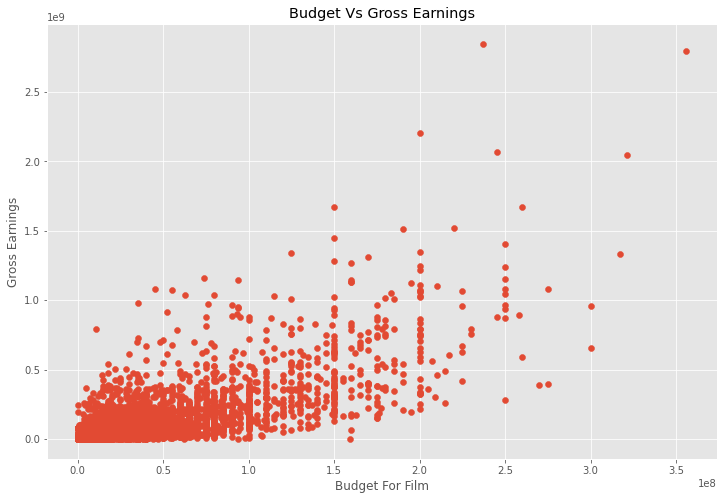

In [314]:
# Scatter plot with Budget vs gross

plt.scatter(x=df1['budget'],y=df1['gross'])
plt.title('Budget Vs Gross Earnings')
plt.xlabel('Budget For Film')
plt.ylabel('Gross Earnings')
plt.show()

In [315]:
df1.head()

,votes,budget,gross,runtime,name,rating,genre,released,director,writer,star,country,company,year_correct
5445,1100000.0,237000000,2847246203,162.0,Avatar,PG-13,Action,2009-12-18,James Cameron,James Cameron,Sam Worthington,United States,Twentieth Century Fox,2009
7445,903000.0,356000000,2797501328,181.0,Avengers: Endgame,PG-13,Action,2019-04-26,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,Marvel Studios,2019
3045,1100000.0,200000000,2201647264,194.0,Titanic,PG-13,Drama,1997-12-19,James Cameron,James Cameron,Leonardo DiCaprio,United States,Twentieth Century Fox,1997
6663,876000.0,245000000,2069521700,138.0,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015-12-18,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,Lucasfilm,2015
7244,897000.0,321000000,2048359754,149.0,Avengers: Infinity War,PG-13,Action,2018-04-27,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,Marvel Studios,2018


<AxesSubplot:xlabel='budget', ylabel='gross'>

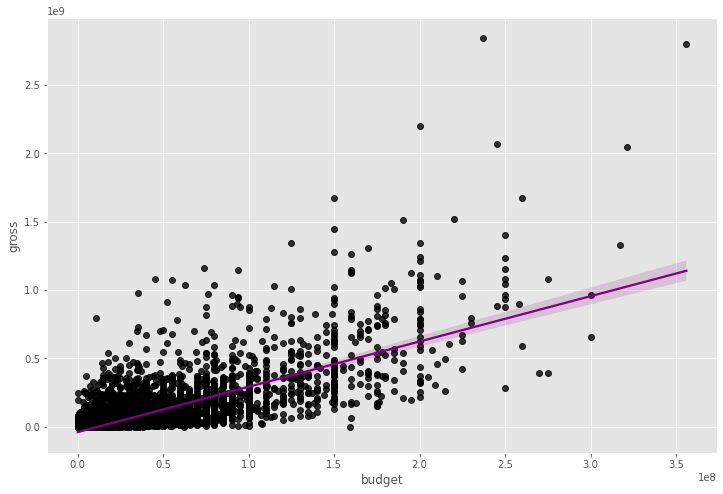

In [316]:
# Plot Budget vs Gross using seaborn

sns.regplot(x='budget',y='gross',data=df1,scatter_kws={"color":"black"},line_kws={"color":"purple"})

In [317]:
df1.corr(method='pearson') #pearson , kendall, spearman

,votes,budget,gross,runtime,year_correct
votes,1.000000,0.421007,0.628713,0.309166,0.213804
budget,0.421007,1.000000,0.711270,0.265287,0.252289
gross,0.628713,0.711270,1.000000,0.241335,0.238532
runtime,0.309166,0.265287,0.241335,1.000000,0.117325
year_correct,0.213804,0.252289,0.238532,0.117325,1.000000


In [318]:
df1.corr(method='kendall')

,votes,budget,gross,runtime,year_correct
votes,1.000000,0.161337,0.508040,0.198199,0.326674
budget,0.161337,1.000000,0.258476,0.161710,0.141617
gross,0.508040,0.258476,1.000000,0.156135,0.174894
runtime,0.198199,0.161710,0.156135,1.000000,0.097062
year_correct,0.326674,0.141617,0.174894,0.097062,1.000000


In [319]:
df1.corr(method='spearman')

,votes,budget,gross,runtime,year_correct
votes,1.000000,0.234535,0.688687,0.290105,0.463975
budget,0.234535,1.000000,0.361668,0.227859,0.198688
gross,0.688687,0.361668,1.000000,0.227986,0.255880
runtime,0.290105,0.227859,0.227986,1.000000,0.143019
year_correct,0.463975,0.198688,0.255880,0.143019,1.000000


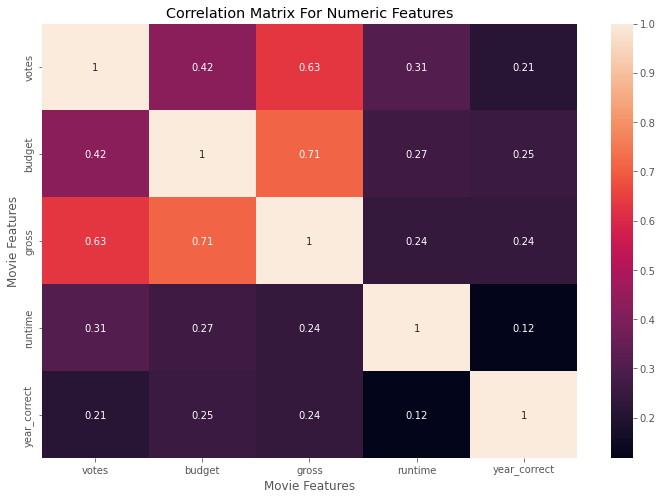

In [320]:
correlation_matrix = df1.corr(method='pearson') #kendall,spearman
sns.heatmap(correlation_matrix,annot=True)
plt.title('Correlation Matrix For Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [321]:
# Converting all categorical variables into numeric code

df1_numerized = df1

for col_name in df1_numerized.columns:
    if(df1_numerized[col_name].dtype == 'object'):
        df1_numerized[col_name]=df1_numerized[col_name].astype('category')
        df1_numerized[col_name]=df1_numerized[col_name].cat.codes
        
df1_numerized

,votes,budget,gross,runtime,name,rating,genre,released,director,writer,star,country,company,year_correct
5445,1100000.0,237000000,2847246203,162.0,533,5,0,2009-12-18,1155,1778,2334,55,2253,2009
7445,903000.0,356000000,2797501328,181.0,535,5,0,2019-04-26,162,743,2241,55,1606,2019
3045,1100000.0,200000000,2201647264,194.0,6896,5,6,1997-12-19,1155,1778,1595,55,2253,1997
6663,876000.0,245000000,2069521700,138.0,5144,5,0,2015-12-18,1125,2550,524,55,1540,2015
7244,897000.0,321000000,2048359754,149.0,536,5,0,2018-04-27,162,743,2241,55,1606,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3818,5200.0,35589876,1400,103.0,3360,6,4,2001-02-09,730,1123,2319,54,477,2001
7625,320.0,35589876,790,104.0,6720,10,4,2019-01-11,2546,2565,1915,55,2308,2019
7580,735.0,35589876,682,93.0,4664,3,5,2020-06-26,1445,2203,2278,55,1992,2020
2417,5100.0,11900000,596,134.0,3406,10,6,1993-04-17,33,1718,2563,27,796,1993


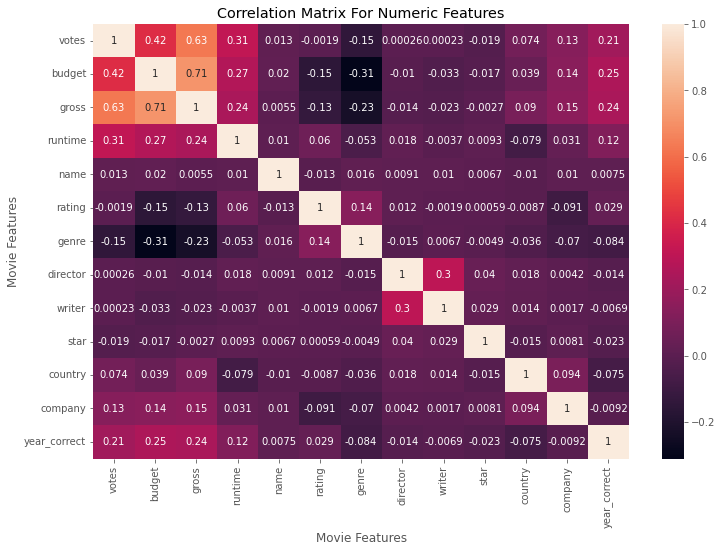

In [226]:
correlation_matrix = df1_numerized.corr(method='pearson') #kendall,spearman
sns.heatmap(correlation_matrix,annot=True)
plt.title('Correlation Matrix For Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [322]:
df1_numerized.corr()

,votes,budget,gross,runtime,name,rating,genre,director,writer,star,country,company,year_correct
votes,1.000000,0.421007,0.628713,0.309166,0.013086,-0.001864,-0.145276,0.000260,0.000232,-0.019452,0.073582,0.130638,0.213804
budget,0.421007,1.000000,0.711270,0.265287,0.020368,-0.151954,-0.310566,-0.010364,-0.033217,-0.016952,0.038620,0.142804,0.252289
gross,0.628713,0.711270,1.000000,0.241335,0.005466,-0.127841,-0.230267,-0.014272,-0.023186,-0.002683,0.089905,0.151228,0.238532
runtime,0.309166,0.265287,0.241335,1.000000,0.010390,0.059657,-0.052699,0.017624,-0.003698,0.009273,-0.079265,0.031040,0.117325
name,0.013086,0.020368,0.005466,0.010390,1.000000,-0.013245,0.016355,0.009079,0.010018,0.006749,-0.010425,0.010369,0.007490
rating,-0.001864,-0.151954,-0.127841,0.059657,-0.013245,1.000000,0.136017,0.011946,-0.001875,0.000592,-0.008653,-0.091386,0.028764
genre,-0.145276,-0.310566,-0.230267,-0.052699,0.016355,0.136017,1.000000,-0.015258,0.006746,-0.004856,-0.035896,-0.070013,-0.083767
director,0.000260,-0.010364,-0.014272,0.017624,0.009079,0.011946,-0.015258,1.000000,0.299512,0.039715,0.017926,0.004250,-0.013696
writer,0.000232,-0.033217,-0.023186,-0.003698,0.010018,-0.001875,0.006746,0.299512,1.000000,0.028745,0.014409,0.001665,-0.006928
star,-0.019452,-0.016952,-0.002683,0.009273,0.006749,0.000592,-0.004856,0.039715,0.028745,1.000000,-0.014749,0.008072,-0.023325


In [328]:
correlation_mat=df1_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

votes         votes           1.000000
              budget          0.421007
              gross           0.628713
              runtime         0.309166
              name            0.013086
                                ...   
year_correct  writer         -0.006928
              star           -0.023325
              country        -0.074978
              company        -0.009188
              year_correct    1.000000
Length: 169, dtype: float64

In [329]:
sorted_pairs=corr_pairs.sort_values()

sorted_pairs

genre         budget         -0.310566
budget        genre          -0.310566
genre         gross          -0.230267
gross         genre          -0.230267
rating        budget         -0.151954
                                ...   
runtime       runtime         1.000000
gross         gross           1.000000
budget        budget          1.000000
company       company         1.000000
year_correct  year_correct    1.000000
Length: 169, dtype: float64

In [331]:
high_corr = sorted_pairs[(sorted_pairs)>0.5]
high_corr

gross         votes           0.628713
votes         gross           0.628713
budget        gross           0.711270
gross         budget          0.711270
votes         votes           1.000000
genre         genre           1.000000
country       country         1.000000
star          star            1.000000
writer        writer          1.000000
director      director        1.000000
rating        rating          1.000000
name          name            1.000000
runtime       runtime         1.000000
gross         gross           1.000000
budget        budget          1.000000
company       company         1.000000
year_correct  year_correct    1.000000
dtype: float64

 Budget & Votes have highest correlation to Gross Earnings